In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
st = pd.read_csv("stock_market_dataset (1).csv")

In [9]:
st

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,Bollinger_Upper,Bollinger_Lower,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target
0,AAPL,2010-01-04,445.627510,465.464143,431.513035,450.378213,2441288,301.310351,64.061774,2.449751,464.398638,438.231589,2.845199,1.505217,4.360374,-0.079418,445.714557,0
1,AAPL,2010-01-05,441.194244,449.726464,432.618124,437.397748,4714199,280.015623,52.032235,-3.726473,450.099041,431.018080,3.352677,1.516110,2.309996,0.511900,439.507357,1
2,AAPL,2010-01-07,395.417421,399.413060,385.055059,388.718345,3948217,323.131496,71.817441,-4.215862,396.010670,374.092744,3.471209,2.256823,0.984588,0.049279,387.335810,0
3,AAPL,2010-01-11,478.631057,501.639769,461.991967,484.401144,3637733,273.944016,67.133451,1.574418,496.399599,479.317188,2.962110,2.238436,1.754234,0.737874,476.642532,0
4,AAPL,2010-01-12,179.950904,183.900759,175.076588,181.516782,693492,237.354447,84.797294,1.552505,189.479672,171.610610,2.727858,2.378014,2.562107,-0.905092,182.863272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,TSLA,2202-12-01,252.632973,255.849960,246.056470,253.503707,4231791,308.690354,52.049065,0.006139,263.440844,244.288946,3.139296,2.056435,2.671630,0.859307,248.582750,0
50345,TSLA,2202-12-09,144.930034,149.742444,136.559836,142.888733,3163615,251.171784,69.407608,3.285598,156.125748,135.966587,2.904545,1.660142,2.454363,-0.036178,141.163357,0
50346,TSLA,2202-12-13,309.154585,318.731779,300.264935,310.458377,4277458,261.636379,46.411470,-3.419487,322.696934,299.873656,3.148182,2.483237,2.008409,0.915237,310.223950,0
50347,TSLA,2202-12-15,195.542188,198.632883,191.095971,193.650255,1049336,276.348336,28.515595,-2.786398,198.772974,184.331390,2.671756,1.795277,4.345577,-0.836666,190.725552,0


In [10]:
st.columns

Index(['Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10',
       'RSI', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'GDP_Growth',
       'Inflation_Rate', 'Interest_Rate', 'Sentiment_Score', 'Next_Close',
       'Target'],
      dtype='object')

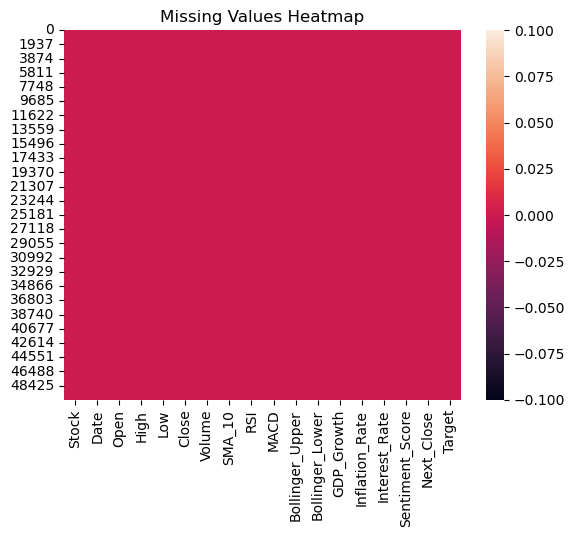

In [12]:
# 1. Are there missing values in the dataset? 
# plt.figure(figsize=(12,6))
sns.heatmap(st.isnull())
plt.title("Missing Values Heatmap")
plt.show()

# there  are  no missing values in the dataset

In [14]:
# 2. What is the data type of each column?
st.dtypes

Stock               object
Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
SMA_10             float64
RSI                float64
MACD               float64
Bollinger_Upper    float64
Bollinger_Lower    float64
GDP_Growth         float64
Inflation_Rate     float64
Interest_Rate      float64
Sentiment_Score    float64
Next_Close         float64
Target               int64
dtype: object

In [16]:
# 3. Convert Date to datetime format.
st['Date'] = pd.to_datetime(st['Date'])


In [17]:
st.dtypes

Stock                      object
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                      int64
SMA_10                    float64
RSI                       float64
MACD                      float64
Bollinger_Upper           float64
Bollinger_Lower           float64
GDP_Growth                float64
Inflation_Rate            float64
Interest_Rate             float64
Sentiment_Score           float64
Next_Close                float64
Target                      int64
dtype: object

In [18]:
# 4. Check for duplicate rows.
st.duplicated().sum()

0

no duplicated value

In [20]:
st

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,Bollinger_Upper,Bollinger_Lower,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target
0,AAPL,2010-01-04,445.627510,465.464143,431.513035,450.378213,2441288,301.310351,64.061774,2.449751,464.398638,438.231589,2.845199,1.505217,4.360374,-0.079418,445.714557,0
1,AAPL,2010-01-05,441.194244,449.726464,432.618124,437.397748,4714199,280.015623,52.032235,-3.726473,450.099041,431.018080,3.352677,1.516110,2.309996,0.511900,439.507357,1
2,AAPL,2010-01-07,395.417421,399.413060,385.055059,388.718345,3948217,323.131496,71.817441,-4.215862,396.010670,374.092744,3.471209,2.256823,0.984588,0.049279,387.335810,0
3,AAPL,2010-01-11,478.631057,501.639769,461.991967,484.401144,3637733,273.944016,67.133451,1.574418,496.399599,479.317188,2.962110,2.238436,1.754234,0.737874,476.642532,0
4,AAPL,2010-01-12,179.950904,183.900759,175.076588,181.516782,693492,237.354447,84.797294,1.552505,189.479672,171.610610,2.727858,2.378014,2.562107,-0.905092,182.863272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,TSLA,2202-12-01,252.632973,255.849960,246.056470,253.503707,4231791,308.690354,52.049065,0.006139,263.440844,244.288946,3.139296,2.056435,2.671630,0.859307,248.582750,0
50345,TSLA,2202-12-09,144.930034,149.742444,136.559836,142.888733,3163615,251.171784,69.407608,3.285598,156.125748,135.966587,2.904545,1.660142,2.454363,-0.036178,141.163357,0
50346,TSLA,2202-12-13,309.154585,318.731779,300.264935,310.458377,4277458,261.636379,46.411470,-3.419487,322.696934,299.873656,3.148182,2.483237,2.008409,0.915237,310.223950,0
50347,TSLA,2202-12-15,195.542188,198.632883,191.095971,193.650255,1049336,276.348336,28.515595,-2.786398,198.772974,184.331390,2.671756,1.795277,4.345577,-0.836666,190.725552,0


In [28]:
# 5. Check the range of RSI (Relative Strength Index)
print(f"MAX RSI: {st['RSI'].max()}")
print(f"MIN RSI: {st['RSI'].min()}")

MAX RSI: 89.99970361452127
MIN RSI: 10.000910691042568


In [35]:
# 6. Verify if Next_Close corresponds to the next day’s Close.
st['Close_shifted'] = st['Close'].shift(-1)
(st['Next_Close'] == st['Close_shifted']).all()

False

In [38]:
# 7. Check if any column has constant value
constant_columns = st.columns[st.nunique() == 1]
constant_columns


Index([], dtype='object')

In [39]:
st

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,Bollinger_Upper,Bollinger_Lower,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target,Close_shifted,Next_Close_Calc
0,AAPL,2010-01-04,445.627510,465.464143,431.513035,450.378213,2441288,301.310351,64.061774,2.449751,464.398638,438.231589,2.845199,1.505217,4.360374,-0.079418,445.714557,0,437.397748,437.397748
1,AAPL,2010-01-05,441.194244,449.726464,432.618124,437.397748,4714199,280.015623,52.032235,-3.726473,450.099041,431.018080,3.352677,1.516110,2.309996,0.511900,439.507357,1,388.718345,388.718345
2,AAPL,2010-01-07,395.417421,399.413060,385.055059,388.718345,3948217,323.131496,71.817441,-4.215862,396.010670,374.092744,3.471209,2.256823,0.984588,0.049279,387.335810,0,484.401144,484.401144
3,AAPL,2010-01-11,478.631057,501.639769,461.991967,484.401144,3637733,273.944016,67.133451,1.574418,496.399599,479.317188,2.962110,2.238436,1.754234,0.737874,476.642532,0,181.516782,181.516782
4,AAPL,2010-01-12,179.950904,183.900759,175.076588,181.516782,693492,237.354447,84.797294,1.552505,189.479672,171.610610,2.727858,2.378014,2.562107,-0.905092,182.863272,1,296.974151,296.974151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,TSLA,2202-12-01,252.632973,255.849960,246.056470,253.503707,4231791,308.690354,52.049065,0.006139,263.440844,244.288946,3.139296,2.056435,2.671630,0.859307,248.582750,0,142.888733,142.888733
50345,TSLA,2202-12-09,144.930034,149.742444,136.559836,142.888733,3163615,251.171784,69.407608,3.285598,156.125748,135.966587,2.904545,1.660142,2.454363,-0.036178,141.163357,0,310.458377,310.458377
50346,TSLA,2202-12-13,309.154585,318.731779,300.264935,310.458377,4277458,261.636379,46.411470,-3.419487,322.696934,299.873656,3.148182,2.483237,2.008409,0.915237,310.223950,0,193.650255,193.650255
50347,TSLA,2202-12-15,195.542188,198.632883,191.095971,193.650255,1049336,276.348336,28.515595,-2.786398,198.772974,184.331390,2.671756,1.795277,4.345577,-0.836666,190.725552,0,410.052198,410.052198


In [45]:
# 8. Check if 'Target' only has 0s and 1s.
print(st['Target'].unique())


[0 1]


<Axes: ylabel='Volume'>

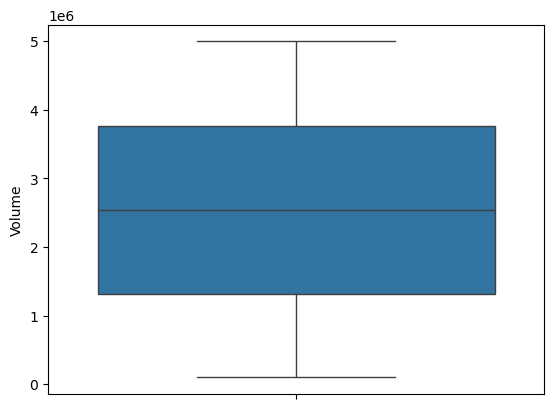

In [14]:
# 9.Are there outliers in Volume?
sns.boxplot(st['Volume'])

## there are no  outliers in Volume

In [52]:
st

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,Bollinger_Upper,Bollinger_Lower,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target,Close_shifted,Next_Close_Calc
0,AAPL,2010-01-04,445.627510,465.464143,431.513035,450.378213,2441288,301.310351,64.061774,2.449751,464.398638,438.231589,2.845199,1.505217,4.360374,-0.079418,445.714557,0,437.397748,437.397748
1,AAPL,2010-01-05,441.194244,449.726464,432.618124,437.397748,4714199,280.015623,52.032235,-3.726473,450.099041,431.018080,3.352677,1.516110,2.309996,0.511900,439.507357,1,388.718345,388.718345
2,AAPL,2010-01-07,395.417421,399.413060,385.055059,388.718345,3948217,323.131496,71.817441,-4.215862,396.010670,374.092744,3.471209,2.256823,0.984588,0.049279,387.335810,0,484.401144,484.401144
3,AAPL,2010-01-11,478.631057,501.639769,461.991967,484.401144,3637733,273.944016,67.133451,1.574418,496.399599,479.317188,2.962110,2.238436,1.754234,0.737874,476.642532,0,181.516782,181.516782
4,AAPL,2010-01-12,179.950904,183.900759,175.076588,181.516782,693492,237.354447,84.797294,1.552505,189.479672,171.610610,2.727858,2.378014,2.562107,-0.905092,182.863272,1,296.974151,296.974151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,TSLA,2202-12-01,252.632973,255.849960,246.056470,253.503707,4231791,308.690354,52.049065,0.006139,263.440844,244.288946,3.139296,2.056435,2.671630,0.859307,248.582750,0,142.888733,142.888733
50345,TSLA,2202-12-09,144.930034,149.742444,136.559836,142.888733,3163615,251.171784,69.407608,3.285598,156.125748,135.966587,2.904545,1.660142,2.454363,-0.036178,141.163357,0,310.458377,310.458377
50346,TSLA,2202-12-13,309.154585,318.731779,300.264935,310.458377,4277458,261.636379,46.411470,-3.419487,322.696934,299.873656,3.148182,2.483237,2.008409,0.915237,310.223950,0,193.650255,193.650255
50347,TSLA,2202-12-15,195.542188,198.632883,191.095971,193.650255,1049336,276.348336,28.515595,-2.786398,198.772974,184.331390,2.671756,1.795277,4.345577,-0.836666,190.725552,0,410.052198,410.052198


<Axes: >

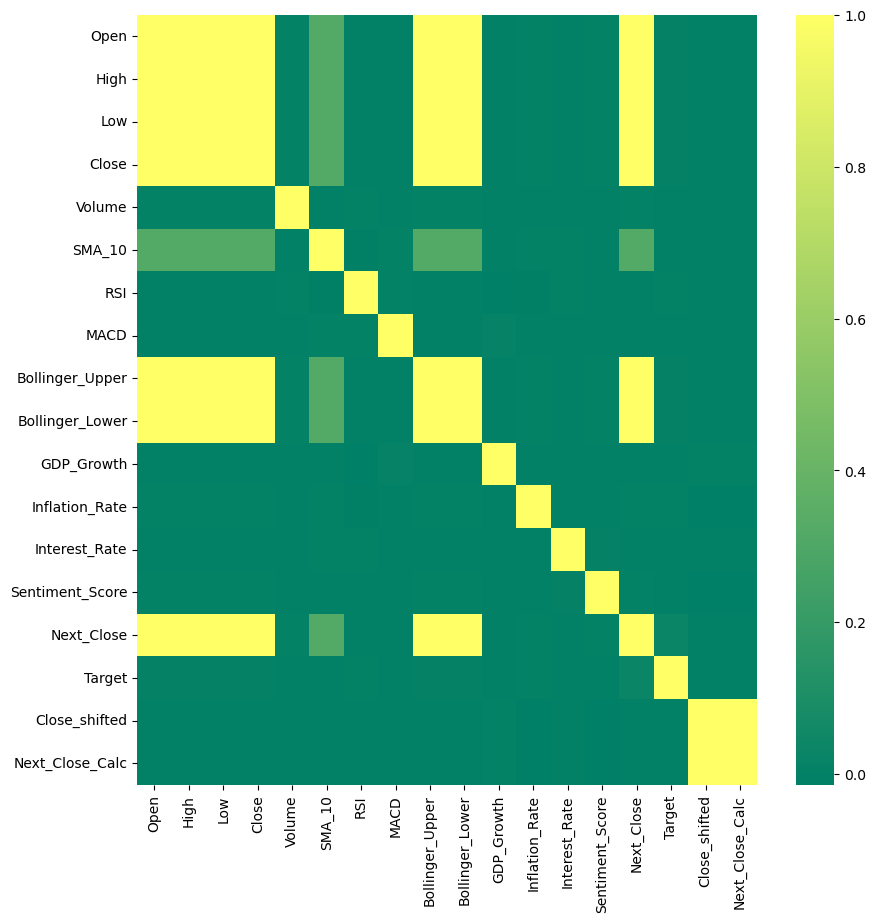

In [51]:
# 10. Check correlation matrix.

corr_matrix = st.drop(['Stock', 'Date'], axis=1).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='summer')



In [54]:
# 11. Are there negative values in Close, Open, MACD, etc.?

cols_to_check = ['Close', 'Open', 'MACD']  

# Check for negative values
for col in cols_to_check:
    if (st[col] < 0).any():
        print(f"Negative values exist in {col}")
    else:
        print(f"No negative values in {col}")

No negative values in Close
No negative values in Open
Negative values exist in MACD


# no,there negative values in Close, Open, MACD

<Axes: ylabel='Interest_Rate'>

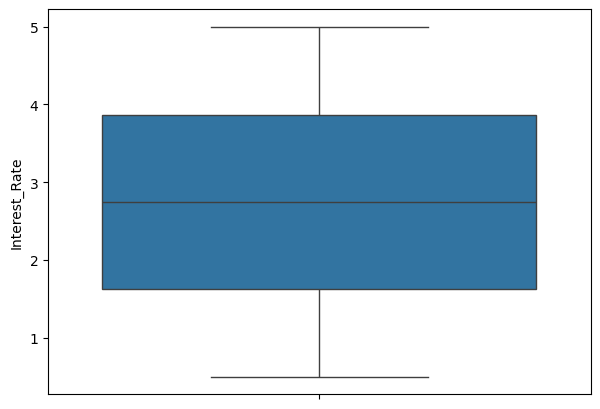

In [56]:
# 12. Check for abrupt spikes in Interest Rate.
plt.figure(figsize=(7,5))
sns.boxplot(st['Interest_Rate'])


we can say that there is not any abrupt spike in Interest rate.

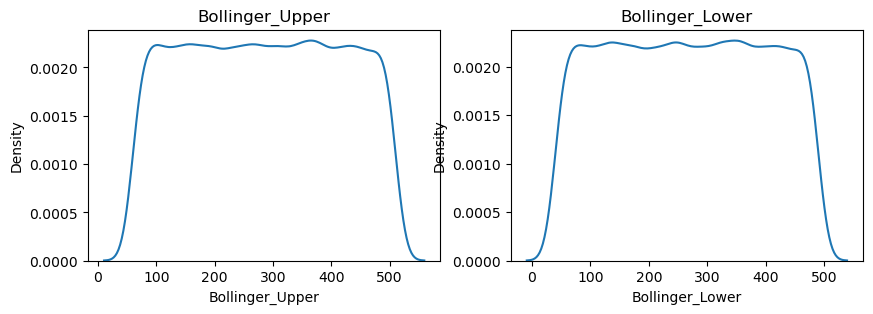

In [57]:
# 13.Do Bollinger Bands make sense?
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.kdeplot(st['Bollinger_Upper'])
plt.title('Bollinger_Upper')

plt.subplot(1, 2, 2)
sns.kdeplot(st['Bollinger_Lower'])
plt.title('Bollinger_Lower')
plt.show()


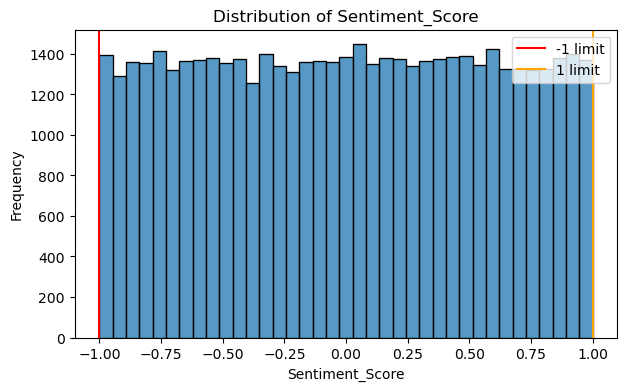

In [59]:
# 14. Is Sentiment_Score standardized (between -1 and 1)?
plt.figure(figsize=(7,4))
sns.histplot(st['Sentiment_Score'])
plt.axvline(-1, color='red', linestyle='-', label='-1 limit')
plt.axvline(1, color='orange', linestyle='-', label='1 limit')
plt.title("Distribution of Sentiment_Score")
plt.xlabel("Sentiment_Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


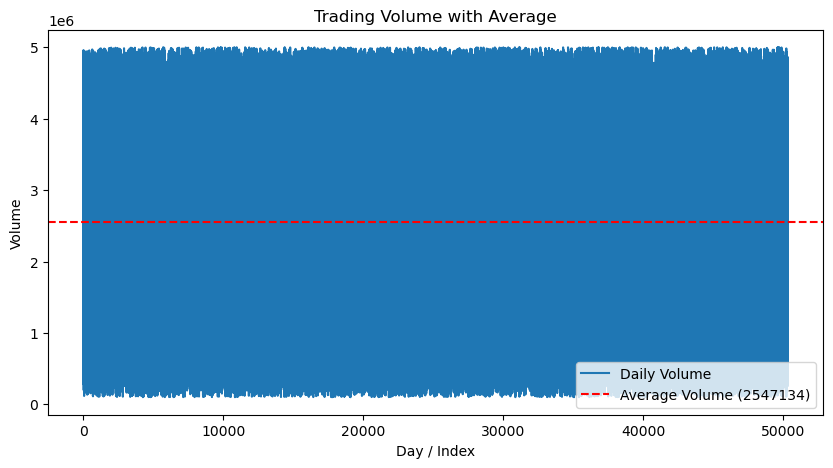

In [62]:
# 15. What is the average trading volume?


avg_volume = st['Volume'].mean()

plt.figure(figsize=(10,5))
plt.plot(st['Volume'], label='Daily Volume')
plt.axhline(avg_volume, color='red', linestyle='--', label=f'Average Volume ({avg_volume:.0f})')
plt.title("Trading Volume with Average")
plt.xlabel("Day / Index")
plt.ylabel("Volume")
plt.legend()
plt.show()

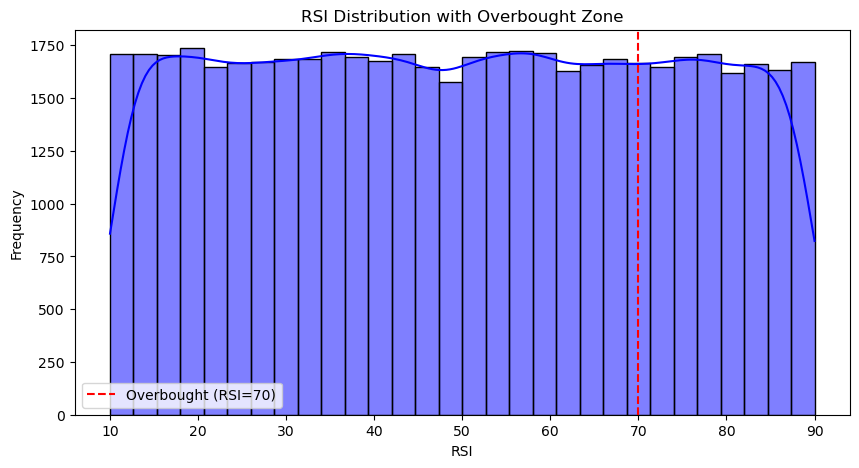

In [65]:
# 16. What % of data has RSI > 70 (overbought zone)?
plt.figure(figsize=(10,5))
sns.histplot(st['RSI'], bins=30, kde=True, color='blue')
plt.axvline(70, color='red', linestyle='--', label='Overbought (RSI=70)')
plt.title("RSI Distribution with Overbought Zone")
plt.xlabel("RSI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

30% of data has RSI > 70 (overbought zone)

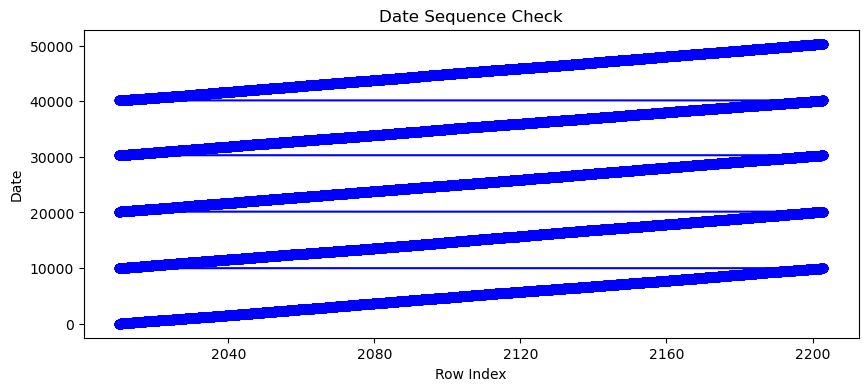

In [87]:
# 17.  Check for monotonic date sequences.
st['Date'] = pd.to_datetime(st['Date'])
df = st.sort_values('Date')

plt.figure(figsize=(10,4))
plt.plot(st['Date'], st.index, marker='o',color='blue')
plt.title("Date Sequence Check")
plt.xlabel("Row Index")
plt.ylabel("Date")
plt.show()

The dates progress consistently and sequentially with row index, showing no missing, reversed, or irregular date entries

In [88]:
st

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,...,Bollinger_Lower,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target,Close_shifted,Next_Close_Calc,Z_Score
0,AAPL,2010-01-04,445.627510,465.464143,431.513035,450.378213,2441288,301.310351,64.061774,2.449751,...,438.231589,2.845199,1.505217,4.360374,-0.079418,445.714557,0,437.397748,437.397748,1.351879
1,AAPL,2010-01-05,441.194244,449.726464,432.618124,437.397748,4714199,280.015623,52.032235,-3.726473,...,431.018080,3.352677,1.516110,2.309996,0.511900,439.507357,1,388.718345,388.718345,1.251864
2,AAPL,2010-01-07,395.417421,399.413060,385.055059,388.718345,3948217,323.131496,71.817441,-4.215862,...,374.092744,3.471209,2.256823,0.984588,0.049279,387.335810,0,484.401144,484.401144,0.876786
3,AAPL,2010-01-11,478.631057,501.639769,461.991967,484.401144,3637733,273.944016,67.133451,1.574418,...,479.317188,2.962110,2.238436,1.754234,0.737874,476.642532,0,181.516782,181.516782,1.614028
4,AAPL,2010-01-12,179.950904,183.900759,175.076588,181.516782,693492,237.354447,84.797294,1.552505,...,171.610610,2.727858,2.378014,2.562107,-0.905092,182.863272,1,296.974151,296.974151,0.719714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,TSLA,2202-12-01,252.632973,255.849960,246.056470,253.503707,4231791,308.690354,52.049065,0.006139,...,244.288946,3.139296,2.056435,2.671630,0.859307,248.582750,0,142.888733,142.888733,0.165050
50345,TSLA,2202-12-09,144.930034,149.742444,136.559836,142.888733,3163615,251.171784,69.407608,3.285598,...,135.966587,2.904545,1.660142,2.454363,-0.036178,141.163357,0,310.458377,310.458377,1.017345
50346,TSLA,2202-12-13,309.154585,318.731779,300.264935,310.458377,4277458,261.636379,46.411470,-3.419487,...,299.873656,3.148182,2.483237,2.008409,0.915237,310.223950,0,193.650255,193.650255,0.273789
50347,TSLA,2202-12-15,195.542188,198.632883,191.095971,193.650255,1049336,276.348336,28.515595,-2.786398,...,184.331390,2.671756,1.795277,4.345577,-0.836666,190.725552,0,410.052198,410.052198,0.626225


In [89]:
# 18. Detect anomalies using Z-Score

from scipy import stats

st['Z_Score'] = np.abs(stats.zscore(df['Close']))
anomalies = st[st['Z_Score'] > 3]

print("Anomalies detected:")
print(anomalies)

Anomalies detected:
Empty DataFrame
Columns: [Stock, Date, Open, High, Low, Close, Volume, SMA_10, RSI, MACD, Bollinger_Upper, Bollinger_Lower, GDP_Growth, Inflation_Rate, Interest_Rate, Sentiment_Score, Next_Close, Target, Close_shifted, Next_Close_Calc, Z_Score]
Index: []

[0 rows x 21 columns]


this data does not contain any anomalies

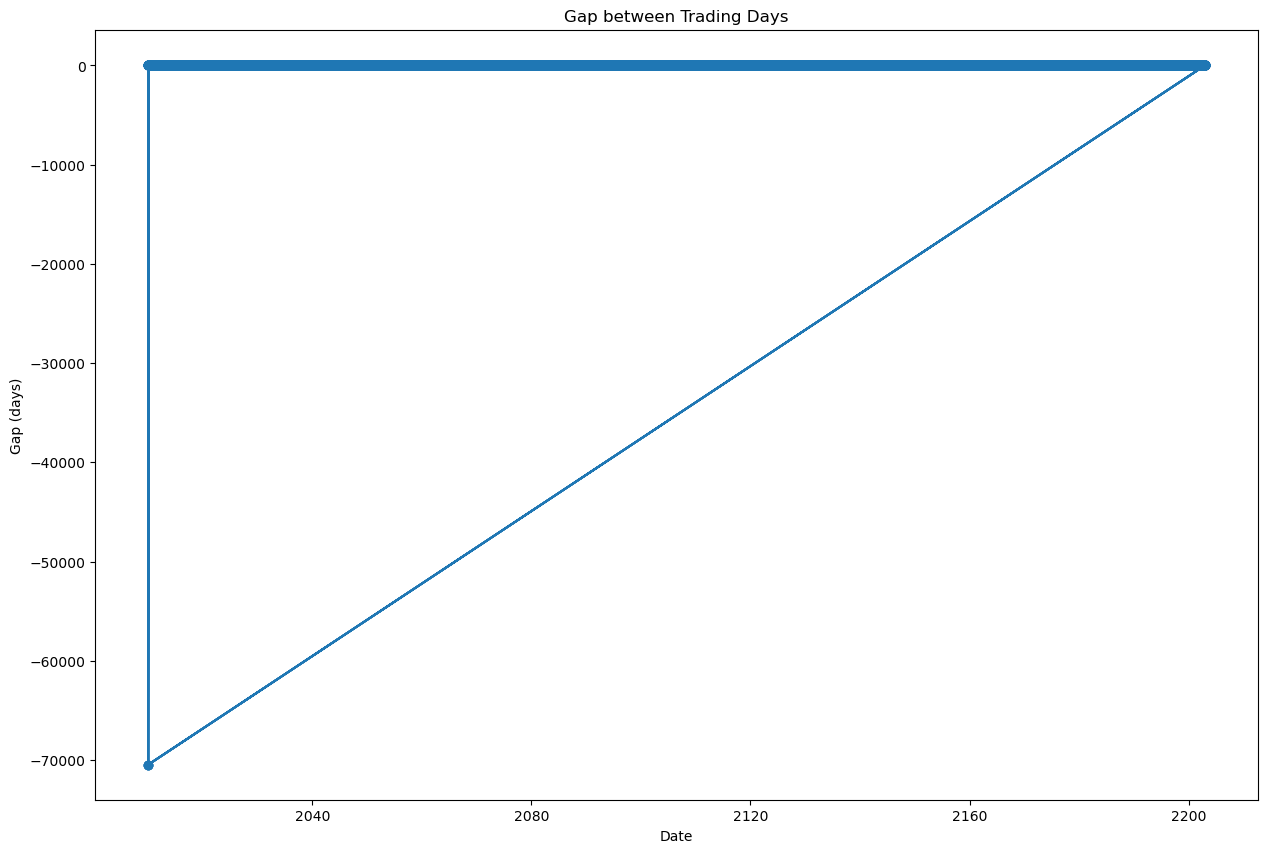

In [91]:
# 19. Are the dates consecutive trading days (excluding weekends/holidays)?
st['Date'] = pd.to_datetime(st['Date'])
st['Diff'] = st['Date'].diff()
st['Diff'] = st['Diff'].dt.days

plt.figure(figsize=(15,10))
plt.plot(st['Date'], st['Diff'], marker='o')
plt.title("Gap between Trading Days")
plt.xlabel("Date")
plt.ylabel("Gap (days)")
plt.show()

The plot shows an abnormally large negative gap between trading days, indicating a date-sorting or date-parsing error in the dataset rather than a real market gap.

In [92]:
st.columns

Index(['Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10',
       'RSI', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'GDP_Growth',
       'Inflation_Rate', 'Interest_Rate', 'Sentiment_Score', 'Next_Close',
       'Target', 'Close_shifted', 'Next_Close_Calc', 'Z_Score', 'Diff'],
      dtype='object')

In [93]:
st

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,...,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target,Close_shifted,Next_Close_Calc,Z_Score,Diff
0,AAPL,2010-01-04,445.627510,465.464143,431.513035,450.378213,2441288,301.310351,64.061774,2.449751,...,2.845199,1.505217,4.360374,-0.079418,445.714557,0,437.397748,437.397748,1.351879,NaN
1,AAPL,2010-01-05,441.194244,449.726464,432.618124,437.397748,4714199,280.015623,52.032235,-3.726473,...,3.352677,1.516110,2.309996,0.511900,439.507357,1,388.718345,388.718345,1.251864,1.0
2,AAPL,2010-01-07,395.417421,399.413060,385.055059,388.718345,3948217,323.131496,71.817441,-4.215862,...,3.471209,2.256823,0.984588,0.049279,387.335810,0,484.401144,484.401144,0.876786,2.0
3,AAPL,2010-01-11,478.631057,501.639769,461.991967,484.401144,3637733,273.944016,67.133451,1.574418,...,2.962110,2.238436,1.754234,0.737874,476.642532,0,181.516782,181.516782,1.614028,4.0
4,AAPL,2010-01-12,179.950904,183.900759,175.076588,181.516782,693492,237.354447,84.797294,1.552505,...,2.727858,2.378014,2.562107,-0.905092,182.863272,1,296.974151,296.974151,0.719714,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,TSLA,2202-12-01,252.632973,255.849960,246.056470,253.503707,4231791,308.690354,52.049065,0.006139,...,3.139296,2.056435,2.671630,0.859307,248.582750,0,142.888733,142.888733,0.165050,23.0
50345,TSLA,2202-12-09,144.930034,149.742444,136.559836,142.888733,3163615,251.171784,69.407608,3.285598,...,2.904545,1.660142,2.454363,-0.036178,141.163357,0,310.458377,310.458377,1.017345,8.0
50346,TSLA,2202-12-13,309.154585,318.731779,300.264935,310.458377,4277458,261.636379,46.411470,-3.419487,...,3.148182,2.483237,2.008409,0.915237,310.223950,0,193.650255,193.650255,0.273789,4.0
50347,TSLA,2202-12-15,195.542188,198.632883,191.095971,193.650255,1049336,276.348336,28.515595,-2.786398,...,2.671756,1.795277,4.345577,-0.836666,190.725552,0,410.052198,410.052198,0.626225,2.0


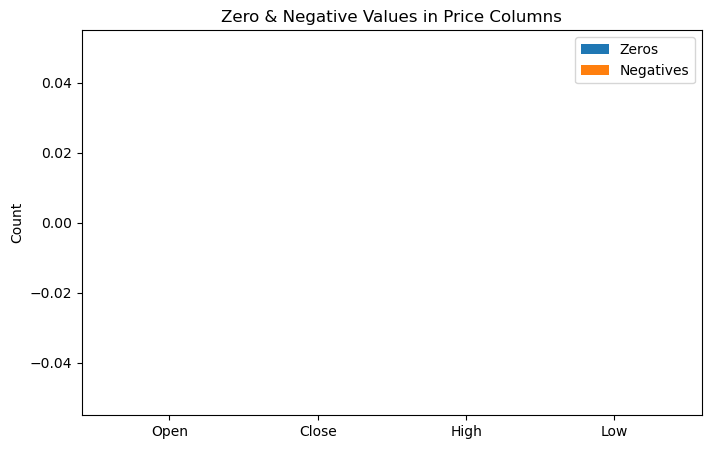

In [94]:
# 20. Are any Open, Close, High, or Low values zero or negative?

cols = ['Open', 'Close', 'High', 'Low']
zeros = [(st[c] == 0).sum() for c in cols]
negatives = [(st[c] < 0).sum() for c in cols]
plt.figure(figsize=(8,5))
plt.bar(cols, zeros, label="Zeros")
plt.bar(cols, negatives, bottom=zeros, label="Negatives")  
plt.ylabel("Count")
plt.title("Zero & Negative Values in Price Columns")
plt.legend()
plt.show()



#### no negative value aur no zeros 

### insightful analysis question

In [95]:
# 1. What’s the average closing price over the dataset?
avg_close = st['Close'].mean()
print("Average Closing Price:", round(avg_close, 2))

Average Closing Price: 274.92


In [96]:
# 2. Which technical indicator has the highest correlation with Target?
corr = st.corr(numeric_only=True)['Target'].sort_values(ascending=False)
print(corr)


Target             1.000000
Next_Close         0.027787
Close              0.006546
High               0.006522
Open               0.006489
Low                0.006425
Bollinger_Upper    0.006370
Bollinger_Lower    0.006347
Inflation_Rate     0.005515
Z_Score            0.003647
RSI                0.002518
Interest_Rate      0.000555
SMA_10             0.000348
MACD              -0.000489
Close_shifted     -0.001541
Next_Close_Calc   -0.001541
Sentiment_Score   -0.002106
Volume            -0.002320
GDP_Growth        -0.003538
Diff              -0.004476
Name: Target, dtype: float64


In [100]:
highest_corr = corr.index[1]   
print("Technical Indicator with Highest Correlation:", highest_corr)
print("Correlation Value:", round(corr[1], 3))

Technical Indicator with Highest Correlation: Next_Close
Correlation Value: 0.028


C:\Users\Dell\AppData\Local\Temp\ipykernel_15792\2366539616.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Correlation Value:", round(corr[1], 3))


In [103]:
# 3. Is RSI > 70 usually followed by a drop (Target = 0)? 
rsi_overbought = st[st['RSI'] > 70]

In [105]:
drop_count = (rsi_overbought['Target'] == 0).sum()
total_count = len(rsi_overbought)

percentage_drop = (drop_count / total_count) * 100
print(f"posibility: {percentage_drop:.2f}%")

posibility: 49.72%


In [106]:
# 4. Do high sentiment scores (> 0.5) predict upward movement? 
high_sentiment = st[st['Sentiment_Score'] > 0.5]

In [110]:
upward_count = (high_sentiment['Target'] == 1).sum()
total_count = len(high_sentiment)

percentage_up = (upward_count / total_count) * 100
print(f"posibility: {percentage_up:.2f}%")

posibility: 49.90%


In [112]:
# 5. How does GDP growth affect stock movement? 
Corr = df['GDP_Growth'].corr(df['Close'])
Corr     

0.00044866793308849344

It is seen that there is near 0% correlation between GDP growth and stockmarket.